# Week 1: Using CNN's with the Cats vs Dogs Dataset

Welcome to the 1st assignment of the course! This week, you will be using the famous `Cats vs Dogs` dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities.

#### TIPS FOR SUCCESSFUL GRADING OF YOUR ASSIGNMENT:

- All cells are frozen except for the ones where you need to submit your solutions or when explicitly mentioned you can interact with it.

- You can add new cells to experiment but these will be omitted by the grader, so don't rely on newly created cells to host your solution code, use the provided places for this.

- You can add the comment # grade-up-to-here in any graded cell to signal the grader that it must only evaluate up to that point. This is helpful if you want to check if you are on the right track even if you are not done with the whole assignment. Be sure to remember to delete the comment afterwards!

- Avoid using global variables unless you absolutely have to. The grader tests your code in an isolated environment without running all cells from the top. As a result, global variables may be unavailable when scoring your submission. Global variables that are meant to be used will be defined in UPPERCASE.

- To submit your notebook, save it and then click on the blue submit button at the beginning of the page.

Let's get started!

### just extracting data "/content/CatDog.7z"


In [ ]:
!pip install py7zr

import py7zr
import os

archive_path = "/content/CatDog.7z"
extract_dir = "/content/extracted_CatDog"

os.makedirs(extract_dir, exist_ok=True)

with py7zr.SevenZipFile(archive_path, mode='r') as z:
    z.extractall(extract_dir)

print(f"Extracted to: {extract_dir}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 31.4 MB/s eta 0:00:00
Extracted to: /content/extracted_CatDog


In [ ]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<a name="2"></a>
## Dataset exploration

Let's explore the dataset in the folder `./PetImages`. There is a subdirectory for each class, so one for dogs and one for cats. The complete tree looks like this:

```
.
└── PetImages/
    ├── Cat/
    │   ├── cat_1.jpg
    │   ├── cat_2.jpg
    │   └── ...
    └── Dog/
        ├── dog_1.jpg
        ├── dog_2.jpg
        └── ...
```

In [ ]:
# Directory that holds the data
DATA_DIR = '/content/extracted_CatDog/CatDog/train'

# Subdirectories for each class
data_dir_dogs = os.path.join(DATA_DIR, './dogs')
data_dir_cats = os.path.join(DATA_DIR, './cats')

# os.listdir returns a list containing all files under the given dir
print(f"There are {len(data_dir_dogs)} images of dogs.")
print(f"There are {len(data_dir_cats)} images of cats.")

There are 45 images of dogs.
There are 45 images of cats.


It is a good start to know how many images there are of each class but let's actually plot some of them to get a better sense of the kinds of images in the dataset:

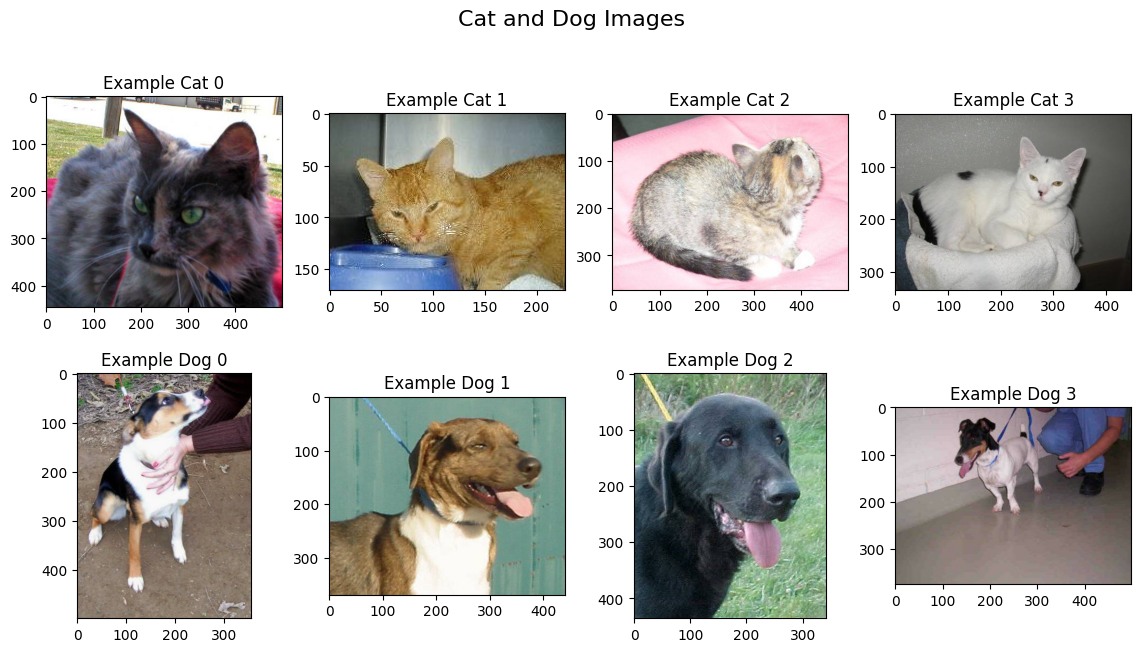

In [ ]:
# Get the filenames for cats and dogs images
cats_filenames = [os.path.join(data_dir_cats, filename) for filename in os.listdir(data_dir_cats)]
dogs_filenames = [os.path.join(data_dir_dogs, filename) for filename in os.listdir(data_dir_dogs)]

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('Cat and Dog Images', fontsize=16)

# Plot the first 4 images of each class
for i, cat_image in enumerate(cats_filenames[:4]):
    img = tf.keras.utils.load_img(cat_image)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Example Cat {i}')

for i, dog_image in enumerate(dogs_filenames[:4]):
    img = tf.keras.utils.load_img(dog_image)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Example Dog {i}')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

These sure are cute! **Notice that these images come in all kinds of resolutions!**

<a name="ex01"></a>
## Exercise 1: train_val_datasets

Now that you are familiar with the raw data it is time for you to create the datasets that will yield batches for both for training and validation. For this, complete the `train_val_datasets` function below.


**Hints:**:

- It is recommended to read the documentation for [`tf.keras.utils.image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) since this function provides a lot of functionalities.

- You should already know the directory in which the images are stored. You can either use the global variable defined earlier or hardcode the path.

- Remember that the images in this dataset come in a variety of resolutions. This can be standardized  by defining the `image_size` parameter which will be used to convert each image to this target resolution. **For this exercise, use a `image_size` of (150, 150)**.

- It is recommended to use a `batch_size`  of 128 as it yields a good trade-off between training times and memory usage.
- You should select an appropriate value for the `label_mode` parameter given that you are dealing with binary classification.



- Since the images haven't been splitted into training and validation sets you should use the `validation_split` parameter for this purpose. **You must use 10% of the images as validation dataset**.
- When using the argument `validation_split`, there are two other arguments that **must be passed** otherwise an exception will be thrown. They are:
- - `seed`, a random seed to avoid overlapping files in training and validation (any positive integer is fine)
- - `subset`, which subset should be returned (training, validation or both). You must use the correct value given the context.


In [ ]:
# GRADED FUNCTION: train_val_datasets

def train_val_datasets():
    """Creates datasets for training and validation.

    Returns:
        (tf.data.Dataset, tf.data.Dataset): Training and validation datasets.
    """


# Define paths and parameters
    directory = '/content/extracted_CatDog/CatDog/train'
    image_size = (150, 150)
    batch_size = 128
    validation_split = 0.1  # 10% for validation

# Create training dataset
    training_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=image_size,
        batch_size=batch_size,
        label_mode="binary",
        validation_split=validation_split,
        subset='training',  # Specify this subset is for training
        seed=42
    )

# Create validation dataset
    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        image_size=image_size,
        batch_size=batch_size,
        label_mode="binary",
        validation_split=validation_split,
        subset='validation',  # Specify this subset is for validation
        seed=42
    )
    # Optimize the datasets for training
    SHUFFLE_BUFFER_SIZE = 1000
    PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

    training_dataset_final = (training_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

    validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

    ### END CODE HERE ###

    return training_dataset_final, validation_dataset_final

In [ ]:
# Create the datasets
training_dataset, validation_dataset = train_val_datasets()

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


**Expected Output:**

```
Found 22434 files belonging to 2 classes.
Using 20191 files for training.
Using 2243 files for validation.
```


<a name="3.2"></a>
Now you have two datasets, one for training and another one for validation. In the ungraded labs you applied some extra transformations to the datasets by using methods of `tf.data.Dataset` such as [prefetch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) or [cache](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache). These help training be faster but they come at the expense of more memory usage and due to memory limitations of this environment, you will not use them in this assignment.


Before proceeding take some time to inspect a batch of the training set, you can do this using the [`take`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) method from a `tf.data.Dataset` while specifying how many batches you want to get. Using this method will yield a tuple with two elements, the first one being the images in the batch and the second one, their respective labels.

In [ ]:
# Get the first batch of images and labels
for images, labels in training_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

Maximum pixel value of images: 255.0

Shape of batch of images: (128, 150, 150, 3)
Shape of batch of labels: (128, 1)


Notice that the pixel values of the images have not yet been normalized at this point so **you must add a Rescaling layer in your model, to apply a factor of 1./255 to these values.**

<a name="ex02"></a>
## Exercise 2: create_model

With the data ready, your next task is to define the architecture of the model that will be trained. Complete the `create_model` function below.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `label_mode` you defined in the previous exercise, which should also be compatible with the last layer of your network. You can tell if they aren't compatible if you get an error during training.

**Hints:**

- **You should use at least 3 convolution layers to achieve the desired performance. This is a necessary condition for this function to pass the grading.**

- **The FIRST layer must be a [tf.keras.layers.Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input) with the appropriate shape argument.**

- **The SECOND layer of your model MUST be the rescaling layer, i.e, [`tf.keras.layers.Rescaling`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling), with the suitable rescaling parameter, as discussed above.**
- **Be mindful about the last layer and its activation function, as it will impact the loss you must use.**


Notice that in this assignment you will define the Rescaling Layer within the model rather than as a pre-processing step. This can be done either way but including this layer within the model allows you to preserve this step when saving the model for latter use.

In [ ]:
# GRADED FUNCTION: create_model

def create_model():
    """Creates the untrained model for classifying cats and dogs.

    Returns:
        tf.keras.Model: The model that will be trained to classify cats and dogs.
    """

    ### START CODE HERE ###

    model = tf.keras.models.Sequential([
        # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
        tf.keras.Input(shape=(150, 150, 3)),
        tf.keras.layers.Rescaling(1./255),
        # Convolution and Pooling layers
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])


    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
	)

    ### END CODE HERE ###

    return model

The next cell allows you to check the number of total and trainable parameters of your model and prompts a warning in case these exceeds those of a reference solution, this serves the following 3 purposes listed in order of priority:
- Helps you prevent crashing the kernel during training.

- Helps you avoid longer-than-necessary training times.
- Provides a reasonable estimate of the size of your model. In general you will usually prefer smaller models given that they accomplish their goal successfully.

**Notice that this is just informative** and may be very well below the actual limit for size of the model necessary to crash the kernel. So even if you exceed this reference you are probably fine. However, **if the kernel crashes during training or it is taking a very long time and your model is larger than the reference, come back here and try to get the number of parameters closer to the reference.**

In [ ]:
# Create the compiled but untrained model
model = create_model()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 568,177 (2.17 MB)

 Trainable params: 568,177 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

Check that the architecture you used is compatible with the dataset (you can ignore the warnings prompted by using the GPU):

In [ ]:
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (128, 1)


**Expected Output:**

```
predictions have shape: (batch_size, n_units)
```
Where `batch_size` is the one you defined and `n_units` is the number of units of the last layer of your model.

<a name="4.2"></a>

<a name="ex03"></a>
## Exercise 3: EarlyStoppingCallback

With the model's architecture now ready, it is time for you to define a callback to stop training if the following conditions are satisfied:

- Training accuracy greater than or equal to 95%


- Validation accuracy greater than or equal to 80%

For this, complete the `EarlyStoppingCallback` class below. Remember from course 1 that you must create a class that inherits from `tf.keras.callbacks.Callback` and you must add a method called `on_epoch_end` with the correct signature to add the stop conditions.

**Hints**:

- You may look at the documentation for [`tf.keras.callbacks.Callback`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)


- Whenever you compile a model with a metric and provide validation data when training that model, TensorFlow will automatically create another metric and append `val_` to its name. Since your model was compiled with the `accuracy` metric and you are using a validation dataset, you will have access to a metric called `val_accuracy`

In [ ]:
# GRADED CLASS: EarlyStoppingCallback

### START CODE HERE ###

# Remember to inherit from the correct class
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    # Define the correct function signature for on_epoch_end method
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = EarlyStoppingCallback()
### END CODE HERE ###

<a name="5"></a>

Now it is time to train your model! The callback should fire before reaching 15 epochs, if this is not the case, try a different architecture for your model!

In [ ]:
# Train the model and save the training history (this may take some time)
history = model.fit(
	training_dataset,
	epochs=15,
	validation_data=validation_dataset,
	callbacks = [EarlyStoppingCallback()]
)

Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 60s 184ms/step - accuracy: 0.5312 - loss: 0.6924 - val_accuracy: 0.5472 - val_loss: 0.6793
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 52s 164ms/step - accuracy: 0.6387 - loss: 0.6396 - val_accuracy: 0.7300 - val_loss: 0.5392
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.7013 - loss: 0.5777 - val_accuracy: 0.6888 - val_loss: 0.5748
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 29s 165ms/step - accuracy: 0.7430 - loss: 0.5161 - val_accuracy: 0.7976 - val_loss: 0.4461
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.7921 - loss: 0.4440 - val_accuracy: 0.8140 - val_loss: 0.4155
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.8196 - loss: 0.3990 - val_accuracy: 0.8276 - val_loss: 0.3856
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.8450 - loss: 0.3507 - val_accuracy: 0.8444 - val_loss: 0.3612
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.8582 - loss: 0

<a name="5.1"></a>
Once training has finished, you can run the following cell to check the training and validation accuracy achieved at the end of each epoch.

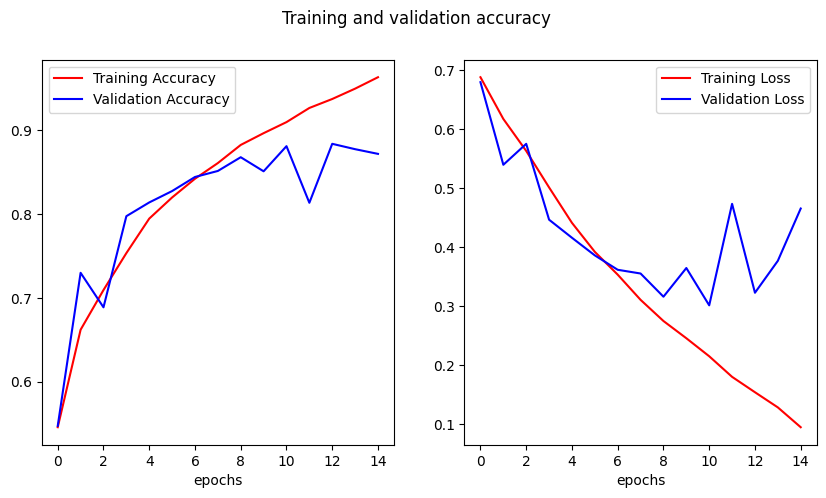

In [53]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

You will probably encounter that the model is overfitting, which means that it is doing a great job at classifying the images in the training set but struggles with new data. This is perfectly fine and you will learn how to mitigate this issue in the upcoming week.

**To pass this assignment your model should have achieved a training accuracy of 95% and a validation accuracy of 80%**. If your model didn't achieve these thresholds, try training again with a different model architecture and remember to use at least 3 convolutional layers.

<a name="6"></a>

**Before submitting your assignment, please run the following code to save your training history as it will be used in grading.**

In [54]:
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

**Congratulations on finishing this week's assignment!**

You have successfully implemented a convolutional neural network that classifies images of cats and dogs, along with the helper functions needed to pre-process the images!

**Keep it up!**